# UAS MACHINE LEARNING

ANGGOTA KELOMPOK :

*   RIFKY BINTANG PRADANA - A11.2022.14038

link YT : https://youtu.be/_0rt0tQh4Vw

*   ILHAM OKTIAN RAMADHAN : A11.2022.14034

link YT : https://youtu.be/kSXDIUDG3hk



TERKAIT DATASET : https://archive.ics.uci.edu/dataset/292/wholesale+customers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Wholesale customers data.csv')

Mounted at /content/drive


In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
import sys
from sklearn.feature_selection import SelectKBest,f_classif #library untuk seleksi fitur
from sklearn.preprocessing import StandardScaler #library untuk scaling
from sklearn.model_selection import train_test_split #library untuk membagi data
from sklearn.neighbors import KNeighborsClassifier #library untuk algoritma KNN
from sklearn.model_selection import  RandomizedSearchCV,GridSearchCV #library untuk mencari parameter terbaik
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score #library untuk evaluasi
#if not sys.warnoptions:
#    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

### Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Wholesale customers data.csv')
print("Number Of Datapoints", len(data))
data.head() #menampilkan 5 data pertama

Number Of Datapoints 440


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Tidak ada data yang Hilang

In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Feature Engineering

### Cek fitur yang bertipe Category

In [ ]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 100:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

### Percobaan cek fitur Kategori

In [ ]:
print('total kategori di fitur Region adalah ',data['Region'].value_counts())

total kategori di fitur Region adalah  Region
3    316
1     77
2     47
Name: count, dtype: int64


In [ ]:
print('total kategori di fitur Channel adalah ',data['Channel'].value_counts())

total kategori di fitur Channel adalah  Channel
1    298
2    142
Name: count, dtype: int64


## Buat Fitur Baru

### Buat Fitur Total Spent

In [ ]:
data['Total_Spending'] = data['Fresh']+data['Milk']+data['Grocery']+data['Frozen']+data['Detergents_Paper']+data['Delicassen']
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


### Fitur Persentase Belanja

In [ ]:
data['Grocery_Percentage'] = (data['Grocery'] / data['Total_Spending']) * 100
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Grocery_Percentage
0,2,3,12669,9656,7561,214,2674,1338,34112,22.165220
1,2,3,7057,9810,9568,1762,3293,1776,33266,28.762099
2,2,3,6353,8808,7684,2405,3516,7844,36610,20.988801
3,1,3,13265,1196,4221,6404,507,1788,27381,15.415799
4,2,3,22615,5410,7198,3915,1777,5185,46100,15.613883


### Fitur Total Makanan yang Mudah basi

In [ ]:
data['Perishable_Spending'] = data['Fresh'] + data['Milk'] + data['Delicassen']
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Grocery_Percentage,Perishable_Spending
0,2,3,12669,9656,7561,214,2674,1338,34112,22.165220,23663
1,2,3,7057,9810,9568,1762,3293,1776,33266,28.762099,18643
2,2,3,6353,8808,7684,2405,3516,7844,36610,20.988801,23005
3,1,3,13265,1196,4221,6404,507,1788,27381,15.415799,16249
4,2,3,22615,5410,7198,3915,1777,5185,46100,15.613883,33210


### Persentase Frozen Food

In [ ]:
data['Frozen_Percentage'] = (data['Frozen'] / data['Total_Spending']) * 100
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Grocery_Percentage,Perishable_Spending,Frozen_Percentage
0,2,3,12669,9656,7561,214,2674,1338,34112,22.165220,23663,0.627345
1,2,3,7057,9810,9568,1762,3293,1776,33266,28.762099,18643,5.296699
2,2,3,6353,8808,7684,2405,3516,7844,36610,20.988801,23005,6.569243
3,1,3,13265,1196,4221,6404,507,1788,27381,15.415799,16249,23.388481
4,2,3,22615,5410,7198,3915,1777,5185,46100,15.613883,33210,8.492408


### Persentase Detergent  Paper

In [ ]:
data['Detergents_Paper_Percentage'] = (data['Detergents_Paper'] / data['Total_Spending']) * 100
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Grocery_Percentage,Perishable_Spending,Frozen_Percentage,Detergents_Paper_Percentage
0,2,3,12669,9656,7561,214,2674,1338,34112,22.165220,23663,0.627345,7.838884
1,2,3,7057,9810,9568,1762,3293,1776,33266,28.762099,18643,5.296699,9.898996
2,2,3,6353,8808,7684,2405,3516,7844,36610,20.988801,23005,6.569243,9.603933
3,1,3,13265,1196,4221,6404,507,1788,27381,15.415799,16249,23.388481,1.851649
4,2,3,22615,5410,7198,3915,1777,5185,46100,15.613883,33210,8.492408,3.854664


### Persentase Fresh Food

In [ ]:
data['Fresh_Percentage'] = (data['Fresh'] / data['Total_Spending']) * 100
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Grocery_Percentage,Perishable_Spending,Frozen_Percentage,Detergents_Paper_Percentage,Fresh_Percentage
0,2,3,12669,9656,7561,214,2674,1338,34112,22.165220,23663,0.627345,7.838884,37.139423
1,2,3,7057,9810,9568,1762,3293,1776,33266,28.762099,18643,5.296699,9.898996,21.213852
2,2,3,6353,8808,7684,2405,3516,7844,36610,20.988801,23005,6.569243,9.603933,17.353182
3,1,3,13265,1196,4221,6404,507,1788,27381,15.415799,16249,23.388481,1.851649,48.446003
4,2,3,22615,5410,7198,3915,1777,5185,46100,15.613883,33210,8.492408,3.854664,49.056399


### Fitur Persentase Susu

In [ ]:
data['Milk_Percentage'] = (data['Milk'] / data['Total_Spending']) * 100
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Grocery_Percentage,Perishable_Spending,Frozen_Percentage,Detergents_Paper_Percentage,Fresh_Percentage,Milk_Percentage
0,2,3,12669,9656,7561,214,2674,1338,34112,22.165220,23663,0.627345,7.838884,37.139423,28.306754
1,2,3,7057,9810,9568,1762,3293,1776,33266,28.762099,18643,5.296699,9.898996,21.213852,29.489569
2,2,3,6353,8808,7684,2405,3516,7844,36610,20.988801,23005,6.569243,9.603933,17.353182,24.059000
3,1,3,13265,1196,4221,6404,507,1788,27381,15.415799,16249,23.388481,1.851649,48.446003,4.367992
4,2,3,22615,5410,7198,3915,1777,5185,46100,15.613883,33210,8.492408,3.854664,49.056399,11.735358


### Delicassen Persentase

In [ ]:
data['Delicassen_Percentage'] = (data['Delicassen'] / data['Total_Spending']) * 100
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Grocery_Percentage,Perishable_Spending,Frozen_Percentage,Detergents_Paper_Percentage,Fresh_Percentage,Milk_Percentage,Delicassen_Percentage
0,2,3,12669,9656,7561,214,2674,1338,34112,22.165220,23663,0.627345,7.838884,37.139423,28.306754,3.922373
1,2,3,7057,9810,9568,1762,3293,1776,33266,28.762099,18643,5.296699,9.898996,21.213852,29.489569,5.338784
2,2,3,6353,8808,7684,2405,3516,7844,36610,20.988801,23005,6.569243,9.603933,17.353182,24.059000,21.425840
3,1,3,13265,1196,4221,6404,507,1788,27381,15.415799,16249,23.388481,1.851649,48.446003,4.367992,6.530076
4,2,3,22615,5410,7198,3915,1777,5185,46100,15.613883,33210,8.492408,3.854664,49.056399,11.735358,11.247289


### Fitur Kategori Pengeluaran

In [ ]:
#fitur yang mengkategorikan pelanggan berdasarkan total pengeluaran
data['Spending_Category'] = pd.cut(data['Total_Spending'], bins=[0, 20000, 40000, 60000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Grocery_Percentage,Perishable_Spending,Frozen_Percentage,Detergents_Paper_Percentage,Fresh_Percentage,Milk_Percentage,Delicassen_Percentage,Spending_Category
0,2,3,12669,9656,7561,214,2674,1338,34112,22.165220,23663,0.627345,7.838884,37.139423,28.306754,3.922373,Medium
1,2,3,7057,9810,9568,1762,3293,1776,33266,28.762099,18643,5.296699,9.898996,21.213852,29.489569,5.338784,Medium
2,2,3,6353,8808,7684,2405,3516,7844,36610,20.988801,23005,6.569243,9.603933,17.353182,24.059000,21.425840,Medium
3,1,3,13265,1196,4221,6404,507,1788,27381,15.415799,16249,23.388481,1.851649,48.446003,4.367992,6.530076,Medium
4,2,3,22615,5410,7198,3915,1777,5185,46100,15.613883,33210,8.492408,3.854664,49.056399,11.735358,11.247289,High


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Channel                      440 non-null    int64   
 1   Region                       440 non-null    int64   
 2   Fresh                        440 non-null    int64   
 3   Milk                         440 non-null    int64   
 4   Grocery                      440 non-null    int64   
 5   Frozen                       440 non-null    int64   
 6   Detergents_Paper             440 non-null    int64   
 7   Delicassen                   440 non-null    int64   
 8   Total_Spending               440 non-null    int64   
 9   Grocery_Percentage           440 non-null    float64 
 10  Perishable_Spending          440 non-null    int64   
 11  Frozen_Percentage            440 non-null    float64 
 12  Detergents_Paper_Percentage  440 non-null    float64 
 13  Fresh

### Hapus fitur yang redundant

In [ ]:

# Hapus fitur yang redundant
data = data.drop(['Grocery_Percentage', 'Frozen_Percentage',
                   'Detergents_Paper_Percentage', 'Fresh_Percentage',
                   'Milk_Percentage', 'Delicassen_Percentage'], axis=1)
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Perishable_Spending,Spending_Category
0,2,3,12669,9656,7561,214,2674,1338,34112,23663,Medium
1,2,3,7057,9810,9568,1762,3293,1776,33266,18643,Medium
2,2,3,6353,8808,7684,2405,3516,7844,36610,23005,Medium
3,1,3,13265,1196,4221,6404,507,1788,27381,16249,Medium
4,2,3,22615,5410,7198,3915,1777,5185,46100,33210,High


### Setelah penghapusan fitur

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Channel              440 non-null    int64   
 1   Region               440 non-null    int64   
 2   Fresh                440 non-null    int64   
 3   Milk                 440 non-null    int64   
 4   Grocery              440 non-null    int64   
 5   Frozen               440 non-null    int64   
 6   Detergents_Paper     440 non-null    int64   
 7   Delicassen           440 non-null    int64   
 8   Total_Spending       440 non-null    int64   
 9   Perishable_Spending  440 non-null    int64   
 10  Spending_Category    440 non-null    category
dtypes: category(1), int64(10)
memory usage: 35.1 KB


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Perishable_Spending
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364,19321.434091
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730,16598.552310
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000,685.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000,9552.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000,14848.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000,23558.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000,150328.000000


## Cek Kembali Fitur

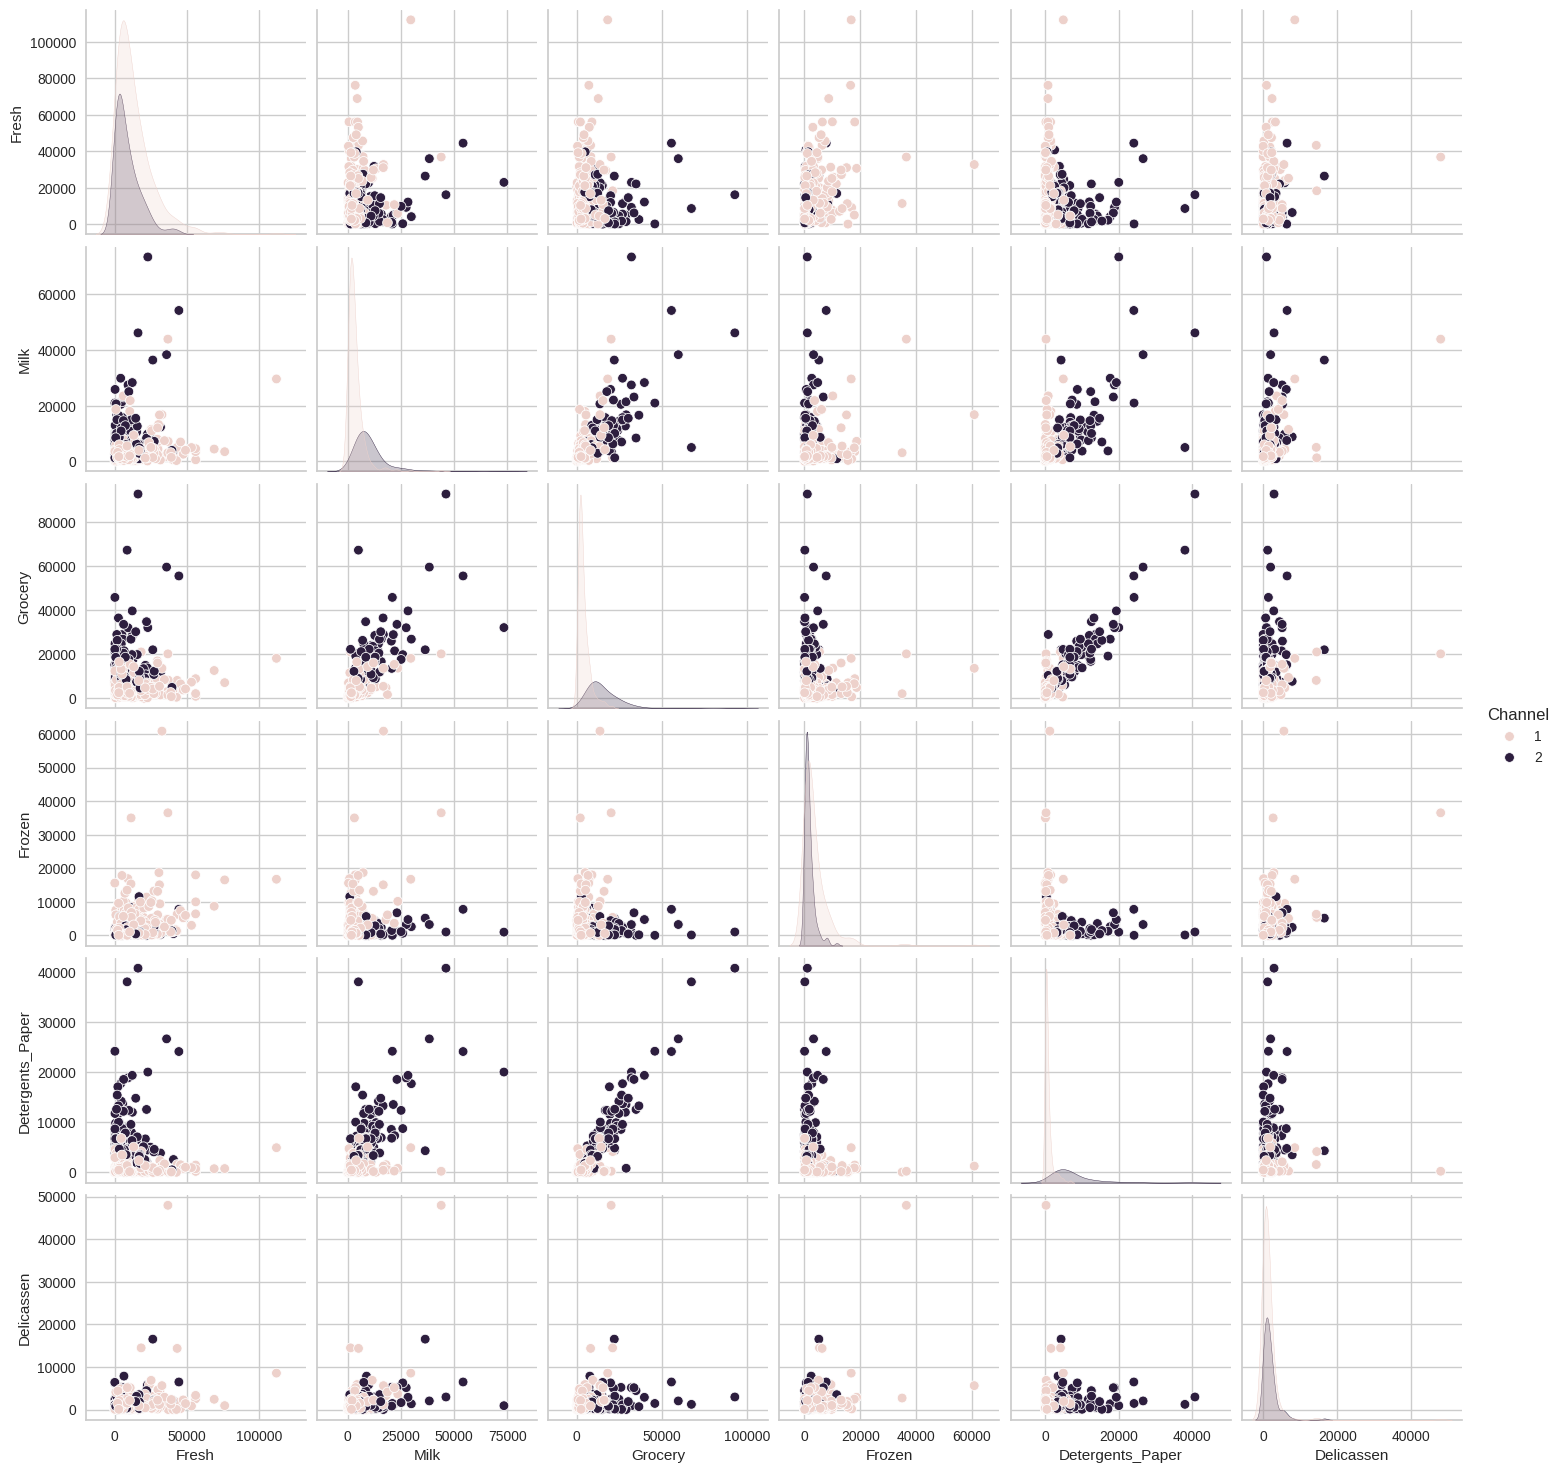

In [ ]:
# Plotting following features
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
sns.pairplot(data, vars = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], hue = "Channel")
plt.show()


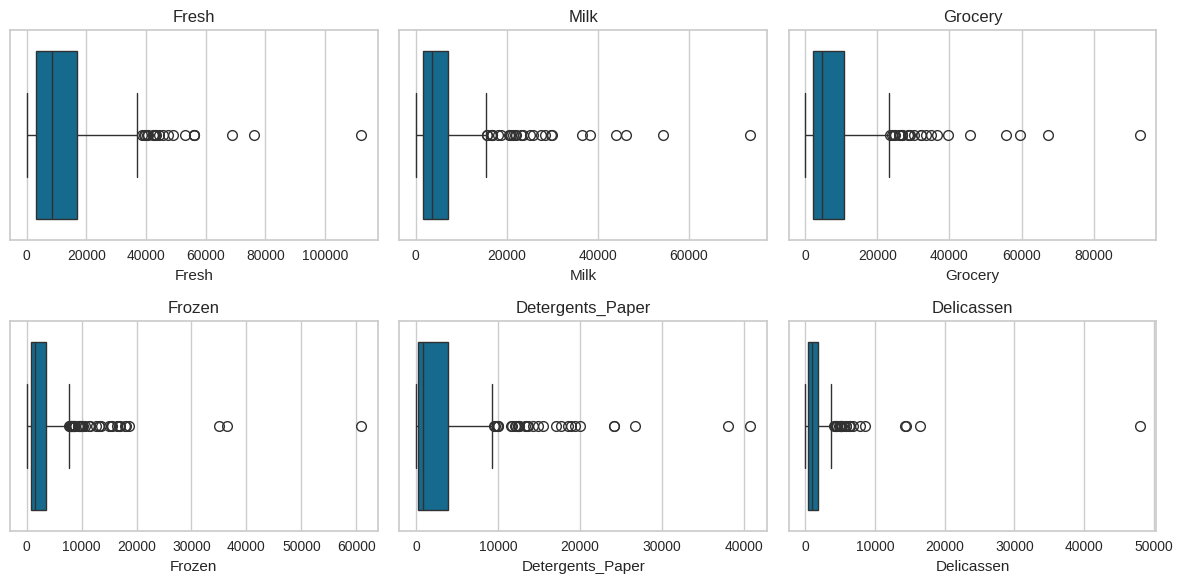

In [ ]:
import matplotlib.pyplot as plt
# Temuan Outlier
# Mengecek outlier menggunakan boxplot
plt.figure(figsize=(12,6))
for i, feature in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=data, x=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()


Temuan : data pada `Milk`,`Frozen` dan `Delicassen` ternyata ada outlier

Keputusan : Remove Outlier

### Remove Outlier

In [ ]:
# Remove outlier
data = data[(data["Fresh"]<20000)]
data = data[(data["Milk"]<10000)]
data = data[(data["Grocery"]<15000)]
data = data[(data["Frozen"]<6000)]
data = data[(data["Detergents_Paper"]<8000)]
data = data[(data["Delicassen"]<3000)]
print("The total number of data-points after removing the outliers are:", len(data))


The total number of data-points after removing the outliers are: 240


## Cek Korelasi

<Axes: >

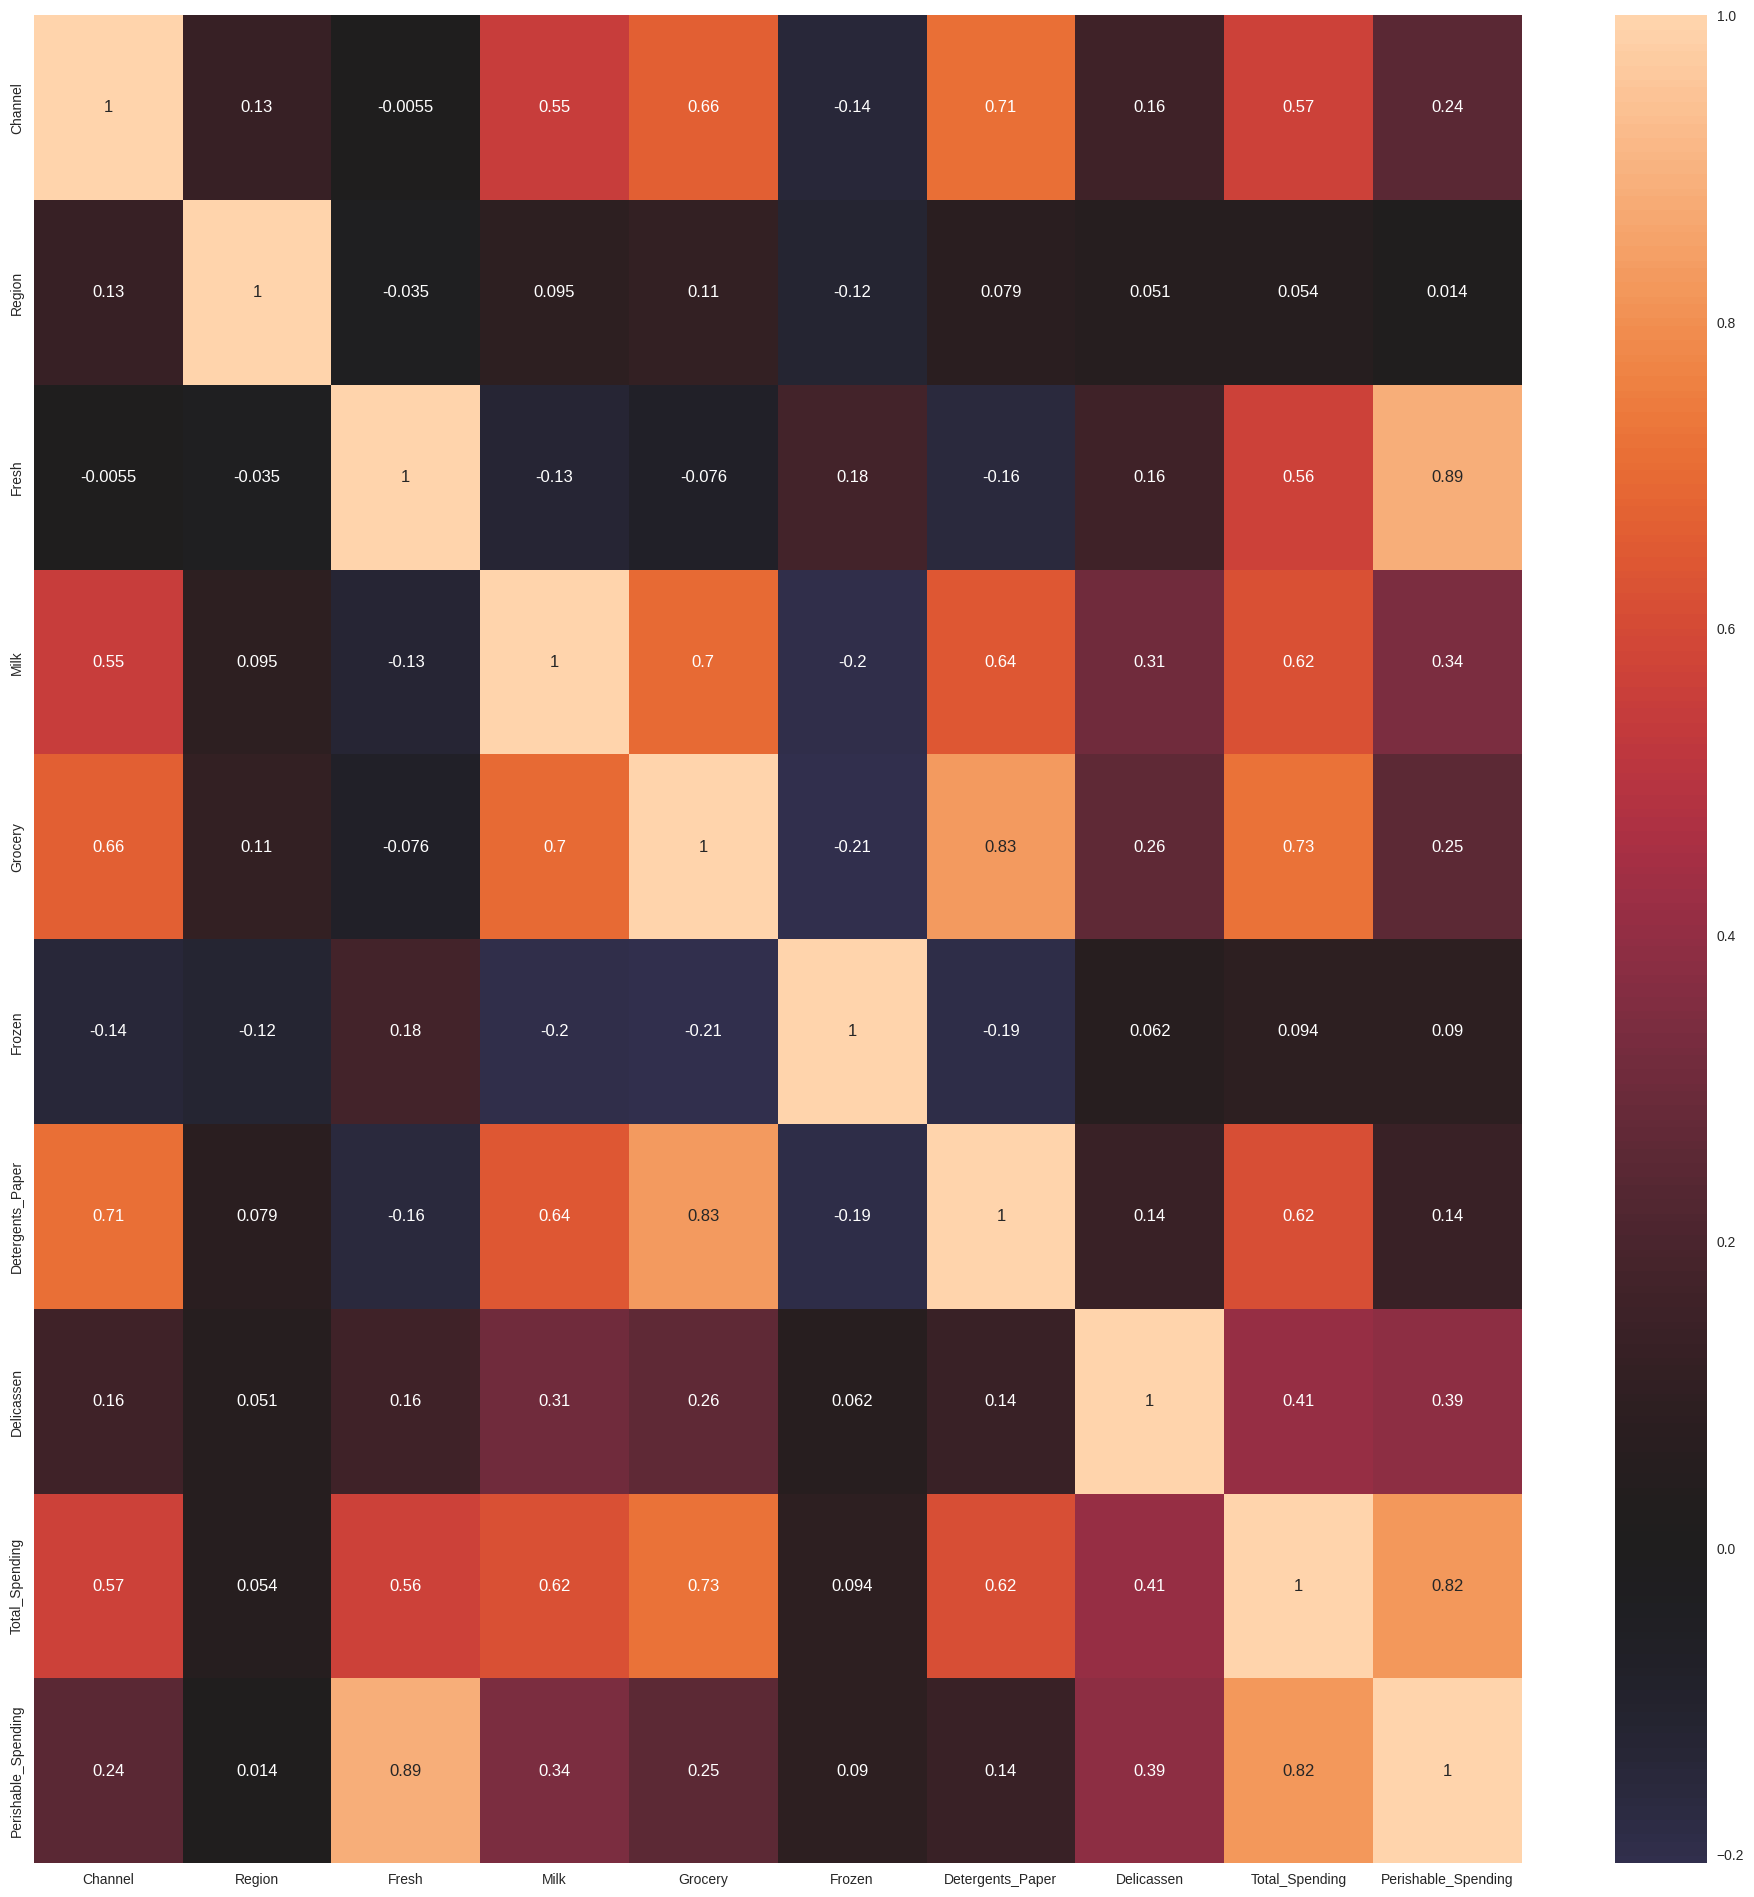

In [ ]:
corrmat= data.corr(numeric_only=True)
plt.figure(figsize=(24,24))
sns.heatmap(corrmat,annot=True, center=0)


## Data Preprocesing

### Cek kembali Kolom Bertipe Kategori

In [ ]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Perishable_Spending,Spending_Category
0,2,3,12669,9656,7561,214,2674,1338,34112,23663,Medium
1,2,3,7057,9810,9568,1762,3293,1776,33266,18643,Medium
5,2,3,9413,8259,5126,666,1795,1451,26710,19123,Medium
6,2,3,12126,3199,6975,480,3140,545,26465,15870,Medium
7,2,3,7579,4956,9426,1669,3321,2566,29517,15101,Medium


### Ubah data bertipe category ke angka menggunakan (LabelEncoder)

In [ ]:
# Ubah data bertipe category menjadi angka yaitu data 'Spending_Category' menggunakan Label Encoder
le = LabelEncoder()
data['Spending_Category'] = le.fit_transform(data['Spending_Category'])
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Perishable_Spending,Spending_Category
0,2,3,12669,9656,7561,214,2674,1338,34112,23663,2
1,2,3,7057,9810,9568,1762,3293,1776,33266,18643,2
5,2,3,9413,8259,5126,666,1795,1451,26710,19123,2
6,2,3,12126,3199,6975,480,3140,545,26465,15870,2
7,2,3,7579,4956,9426,1669,3321,2566,29517,15101,2


In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Perishable_Spending,Spending_Category
0,2,3,12669,9656,7561,214,2674,1338,34112,23663,2
1,2,3,7057,9810,9568,1762,3293,1776,33266,18643,2
5,2,3,9413,8259,5126,666,1795,1451,26710,19123,2
6,2,3,12126,3199,6975,480,3140,545,26465,15870,2
7,2,3,7579,4956,9426,1669,3321,2566,29517,15101,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 439
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Channel              240 non-null    int64
 1   Region               240 non-null    int64
 2   Fresh                240 non-null    int64
 3   Milk                 240 non-null    int64
 4   Grocery              240 non-null    int64
 5   Frozen               240 non-null    int64
 6   Detergents_Paper     240 non-null    int64
 7   Delicassen           240 non-null    int64
 8   Total_Spending       240 non-null    int64
 9   Perishable_Spending  240 non-null    int64
 10  Spending_Category    240 non-null    int64
dtypes: int64(11)
memory usage: 22.5 KB


#### Copy data

In [ ]:
ds = data.copy()

### Hapus data yang tidak diperlukan

In [ ]:
# Hapus kolom yang tidak diperlukan
ds = ds.drop(['Channel', 'Region'], axis=1)
ds.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Perishable_Spending,Spending_Category
0,12669,9656,7561,214,2674,1338,34112,23663,2
1,7057,9810,9568,1762,3293,1776,33266,18643,2
5,9413,8259,5126,666,1795,1451,26710,19123,2
6,12126,3199,6975,480,3140,545,26465,15870,2
7,7579,4956,9426,1669,3321,2566,29517,15101,2


### Fitur Scaling (Untuk Normalisasi)

In [ ]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
scaled_ds.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Perishable_Spending,Spending_Category
0,0.919991,2.536560,0.799909,-1.000272,0.598454,0.693493,1.640406,1.986918,1.185621
1,-0.092738,2.597642,1.349412,0.103431,0.925736,1.338260,1.545450,1.153249,1.185621
2,0.332420,1.982459,0.133223,-0.678002,0.133704,0.859837,0.809591,1.232963,1.185621
3,0.822002,-0.024520,0.639467,-0.810618,0.844841,-0.473860,0.782092,0.692738,1.185621
4,0.001461,0.672369,1.310534,0.037123,0.940540,2.501197,1.124654,0.565031,1.185621


In [ ]:
scaled_ds.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Perishable_Spending,Spending_Category
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,4.440892e-17,4.440892e-17,-8.881784e-17,-2.960595e-17,-2.960595e-17,1.480297e-17,4.440892e-17,2.220446e-17,1.924387e-16
std,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00
min,-1.365687e+00,-1.271545e+00,-1.232731e+00,-1.135026e+00,-8.137735e-01,-1.271723e+00,-2.086927e+00,-1.829028e+00,-2.712312e+00
25%,-8.562545e-01,-8.512094e-01,-7.575628e-01,-7.564308e-01,-7.008904e-01,-8.006598e-01,-7.971817e-01,-7.635671e-01,-7.633452e-01
50%,-1.146636e-01,-3.398462e-01,-3.764427e-01,-3.518111e-01,-5.057905e-01,-2.662978e-01,-1.427265e-01,-1.033991e-01,-7.633452e-01
75%,7.176976e-01,6.746501e-01,6.177001e-01,5.103674e-01,5.235072e-01,6.279858e-01,6.840763e-01,6.508474e-01,1.185621e+00
max,2.227226e+00,2.646428e+00,2.825979e+00,3.014553e+00,3.318222e+00,3.085610e+00,3.127950e+00,2.625124e+00,1.185621e+00


## Clustering Tahap 1

### Cek Kesehatan Cluster (Hopkins Test)
- nilai > 70%, maka layak dipakai
- nilai sekitar 50% maka dianggap random (perlu dimensi reduksi)
- nilai < 30% berarti tidak cocok pakai kmeans, pakai metode yang bisa mengatasi masalah sparse dataset

contoh sparse ada dibawah

<img src='https://i.stack.imgur.com/Af5IH.png'>

In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
#Let's check the Hopkins measure
hopkin_avg = []
for i in range(0,100):
    a = hopkins(scaled_ds)
    hopkin_avg.append(a)

np.array(hopkin_avg).mean()

0.7793238828714211

Karena nilai 0,78 maka bisa lanjut K- Means, untuk memvisualkan saya memakai PCA

## PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["PC1","PC2", "PC3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,240.0,-2.960595e-17,2.028985,-3.693156,-1.599138,-0.609581,1.536198,4.550385
PC2,240.0,1.480297e-17,1.466829,-3.578559,-1.002014,-0.039738,1.033118,3.971709
PC3,240.0,-2.220446e-17,0.957454,-2.341039,-0.634463,-0.174923,0.532735,3.224560


## Visualisasikan PCA

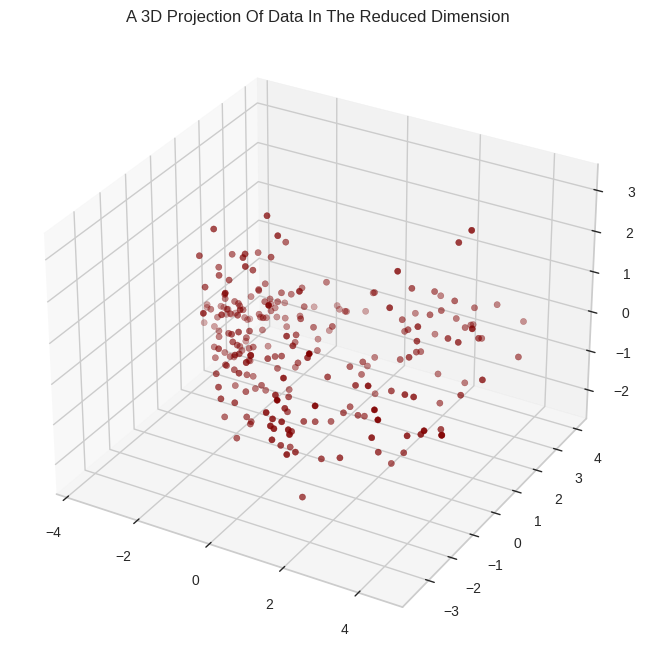

In [ ]:
x =PCA_ds["PC1"]
y =PCA_ds["PC2"]
z =PCA_ds["PC3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering Tahap 2 - K Means

### Cek K Optimal Menggunakan Elbow Method

Elbow Method to determine the number of clusters to be formed:


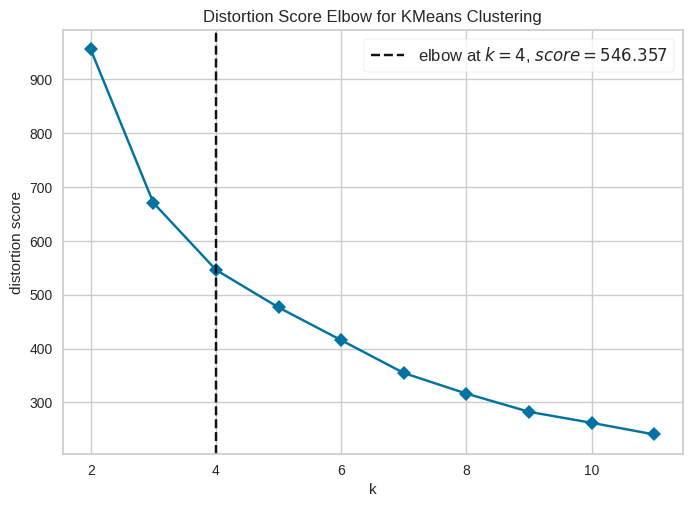

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=(2,12), timings=False)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Keputusan : 4

### Clustering mnggunakan k means

        PC1       PC2       PC3  Clusters
0  3.766305 -0.157791 -0.956822         2
1  3.682558  0.709055  0.726446         2
2  2.384240 -0.088828 -0.416259         3
3  1.674988 -0.115038 -1.226818         3
4  2.857876  0.270016  1.109575         2


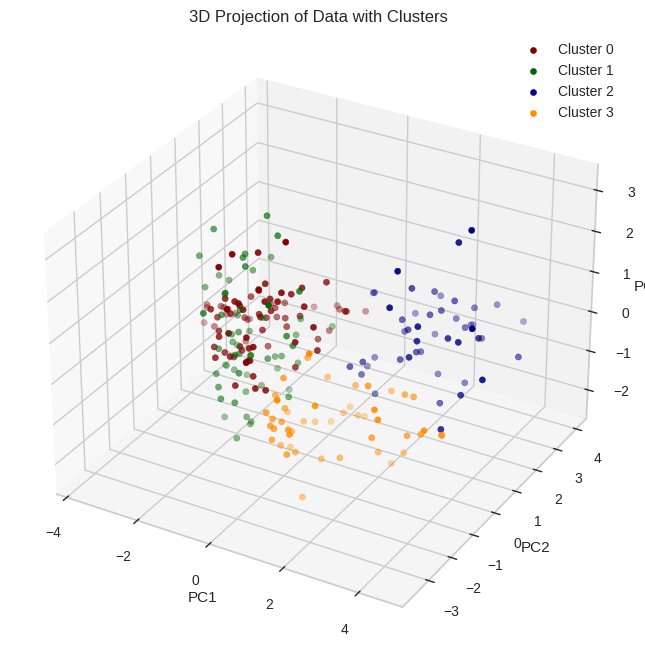

In [ ]:
from sklearn.cluster import KMeans

# Inisialisasi KMeans dengan K=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Melakukan clustering pada data PCA
clusters = kmeans.fit_predict(PCA_ds)

# Menambahkan kolom hasil clustering ke dalam DataFrame PCA_ds
PCA_ds['Clusters'] = clusters

# Menampilkan hasil clustering
print(PCA_ds.head())  # Menampilkan beberapa baris pertama

# Visualisasi hasil clustering dalam 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['maroon', 'darkgreen', 'navy', 'darkorange']  # Warna untuk setiap cluster
for cluster, color in zip(range(4), colors):
    clustered_points = PCA_ds[PCA_ds['Clusters'] == cluster]
    ax.scatter(clustered_points['PC1'], clustered_points['PC2'], clustered_points['PC3'], c=color, label=f'Cluster {cluster}')

ax.set_title('3D Projection of Data with Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

plt.show()


In [ ]:
cluster_stats = PCA_ds.groupby('Clusters').mean()
print(cluster_stats)


               PC1       PC2       PC3
Clusters                              
0        -1.781069  0.744249 -0.175861
1        -0.968028 -0.939716  0.465687
2         2.513512  1.542100  0.222477
3         1.830333 -1.704973 -0.483463


### Personalisasi Cluster
- Cluster 0 : Memiliki nilai PC1 yang rendah hingga sedang dan nilai PC2 yang rendah hingga sedang, dengan PC3 yang lebih tinggi.
- Cluster 1 : Memiliki nilai PC1 yang sangat rendah, nilai PC2 yang sedang hingga tinggi, dan PC3 yang rendah.
- Cluster 2 : Memiliki nilai PC1 yang tinggi, nilai PC2 yang rendah hingga sedang, dan PC3 yang rendah.
- Cluster 3 : Memiliki nilai PC1 dan PC2 yang tinggi, dengan PC3 yang sedang.

### Cek Visualisasi K means Clustering

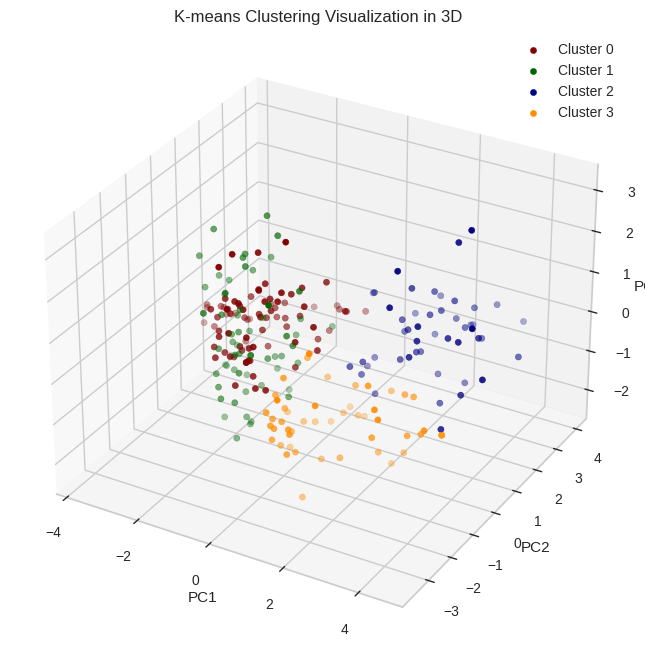

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualisasi 3D dari hasil PCA dengan warna cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['maroon', 'darkgreen', 'navy', 'darkorange']  # Warna untuk setiap cluster
for cluster, color in zip(range(4), colors):
    clustered_points = PCA_ds[PCA_ds['Clusters'] == cluster]
    ax.scatter(clustered_points['PC1'], clustered_points['PC2'], clustered_points['PC3'], c=color, label=f'Cluster {cluster}')

ax.set_title('K-means Clustering Visualization in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
ax.grid(True)

plt.show()


## EValuasi hasil

### Hasil distribusi clustering

<ipython-input-46-b7441113d696>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=PCA_ds["Clusters"], palette=pal, dodge=False)


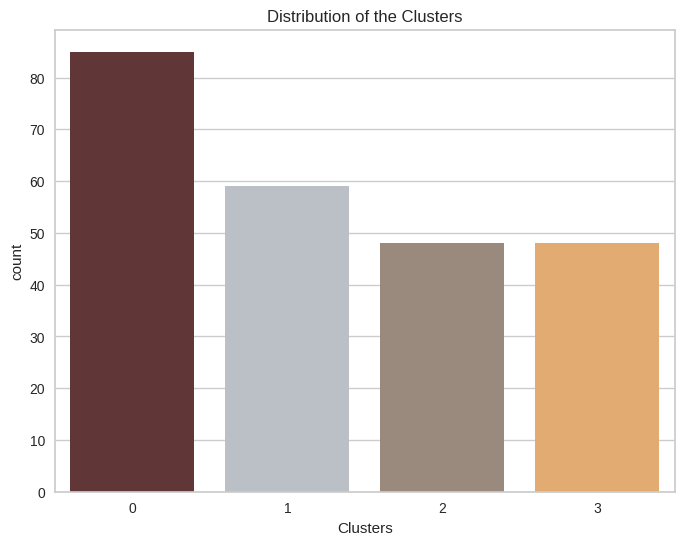

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tentukan palet warna untuk cluster sesuai dengan jumlah cluster yang Anda miliki
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]  # Ganti dengan jumlah warna sesuai dengan jumlah cluster

# Buat plot distribusi cluster
plt.figure(figsize=(8, 6))
pl = sns.countplot(x=PCA_ds["Clusters"], palette=pal, dodge=False)
pl.set_title("Distribution of the Clusters")

# Periksa apakah ada legenda sebelum mencoba untuk menghapusnya
if pl.legend_ is not None:
    pl.legend_.remove()

plt.show()


### MEncari pola cluster - Perishabel_Spending dan Total_Spending

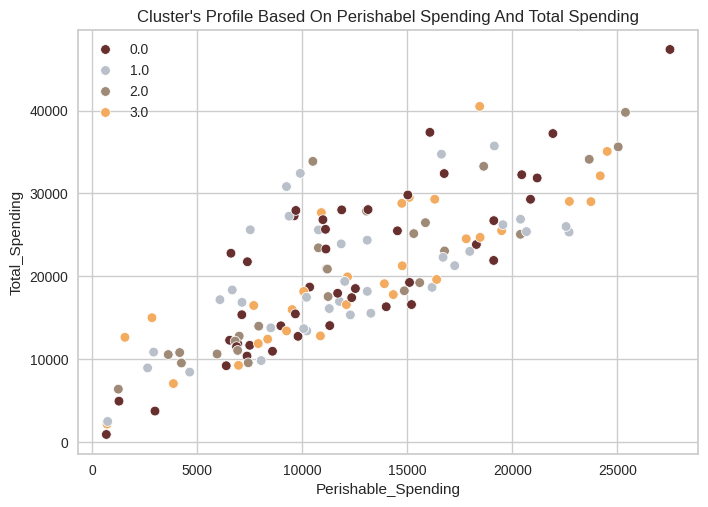

In [ ]:
pl = sns.scatterplot(data = data,x=data["Perishable_Spending"], y=data["Total_Spending"],hue=PCA_ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Perishabel Spending And Total Spending")
plt.legend()
plt.show()


### Distribusi cluster untuk konsumsi

<ipython-input-48-ef552516224f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=PCA_ds["Clusters"], y=data["Total_Spending"], palette=pal)


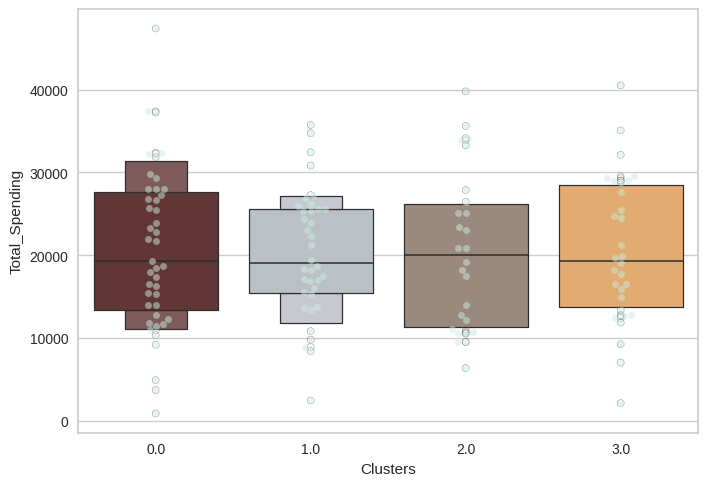

In [ ]:
plt.figure()
pl=sns.swarmplot(x=PCA_ds["Clusters"], y=data["Total_Spending"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=PCA_ds["Clusters"], y=data["Total_Spending"], palette=pal)
plt.show()

## Profiling

In [ ]:
Pelanggan = ["Channel","Region","Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen","Perishable_Spending","Spending_Category"]

<Figure size 800x550 with 0 Axes>

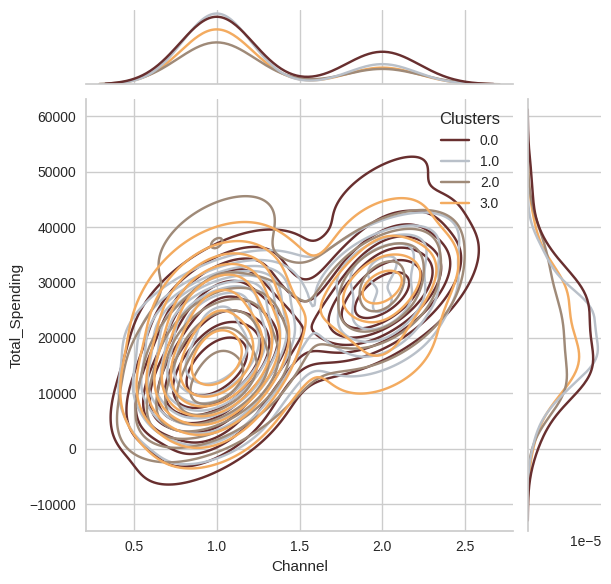

<Figure size 800x550 with 0 Axes>

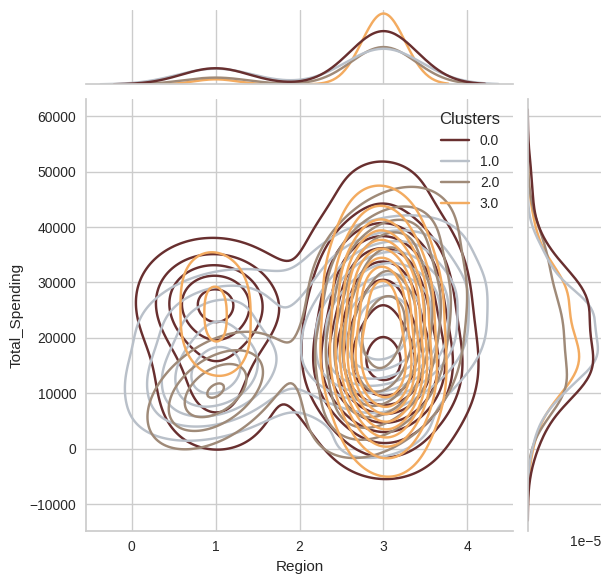

<Figure size 800x550 with 0 Axes>

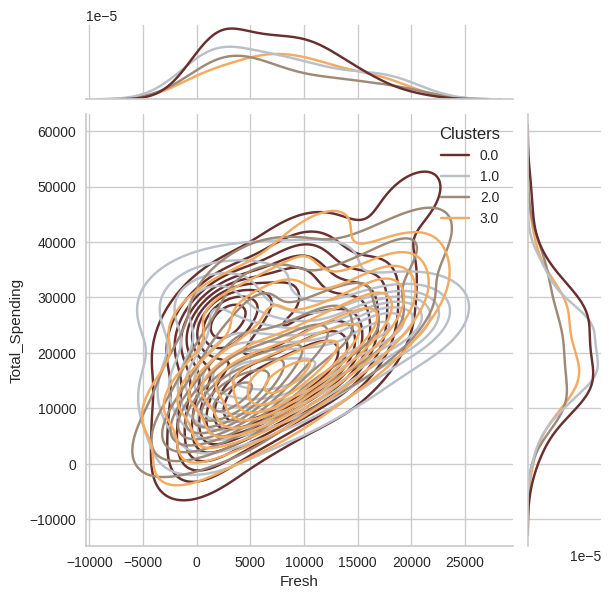

<Figure size 800x550 with 0 Axes>

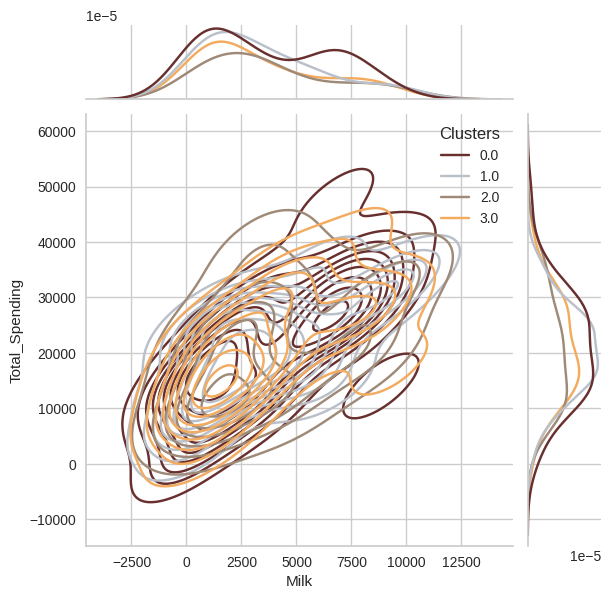

<Figure size 800x550 with 0 Axes>

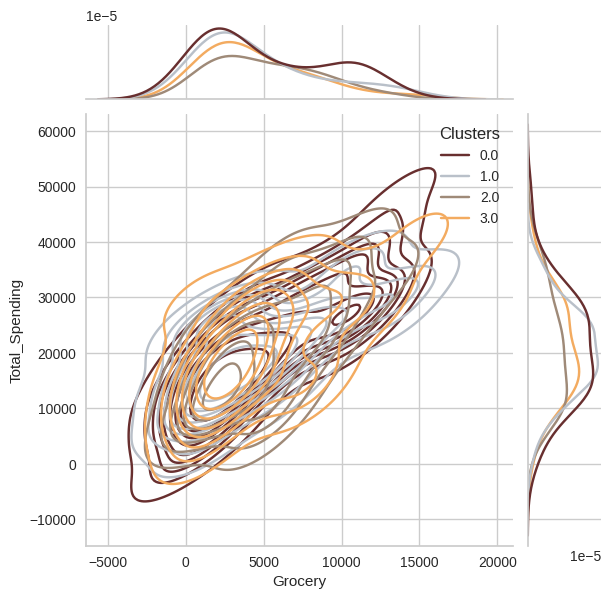

<Figure size 800x550 with 0 Axes>

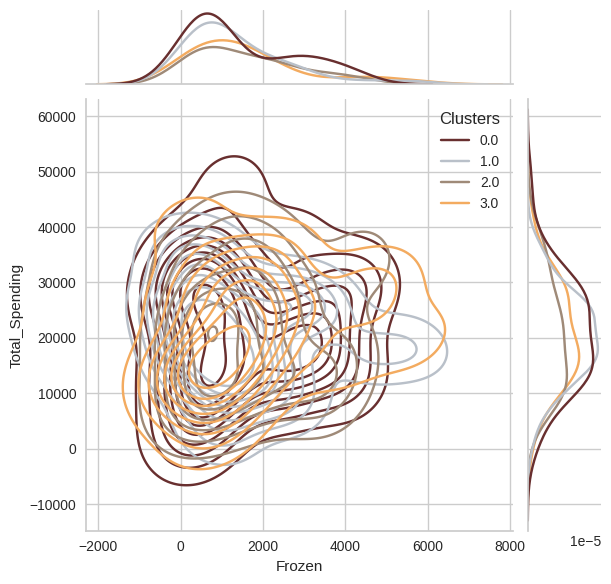

<Figure size 800x550 with 0 Axes>

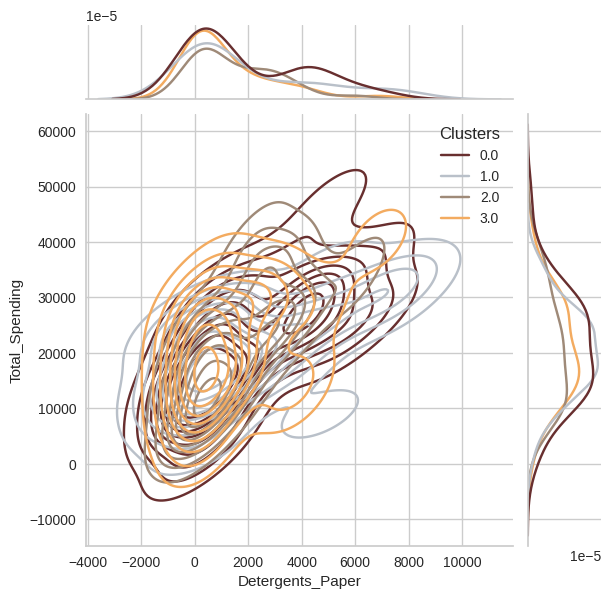

<Figure size 800x550 with 0 Axes>

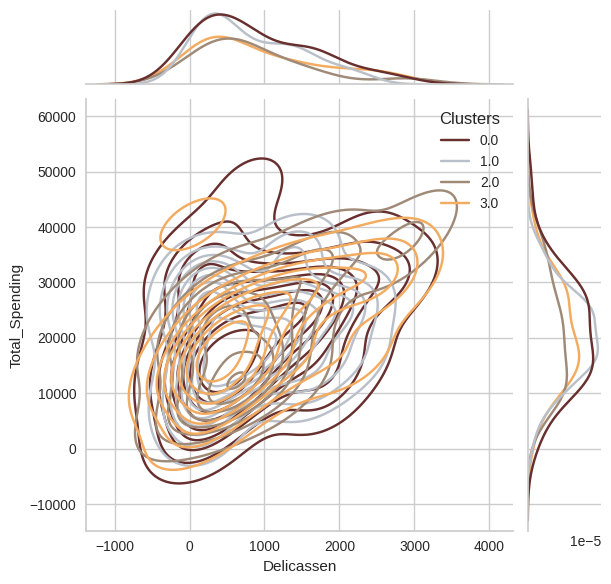

<Figure size 800x550 with 0 Axes>

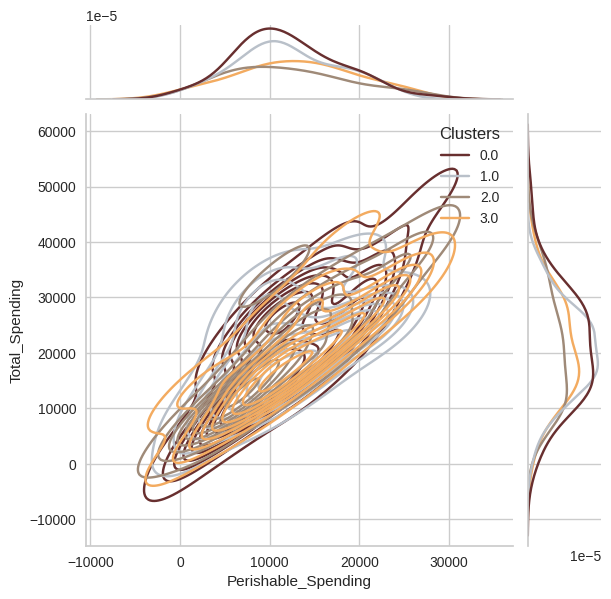

<Figure size 800x550 with 0 Axes>

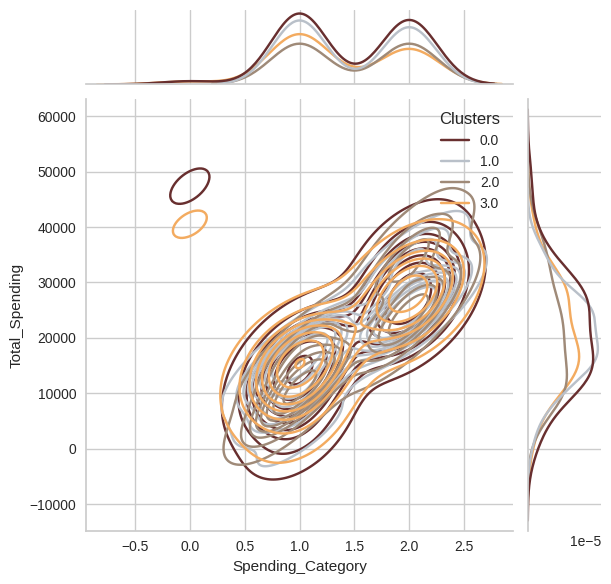

In [ ]:
for i in Pelanggan:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Total_Spending"], hue =PCA_ds["Clusters"], kind="kde", palette=pal)
    plt.show()

Cluster 0: "Pembeli Hemat"
 - Pengeluaran rendah untuk sebagian besar kategori produk, terutama produk segar, susu, dan makanan yang mudah basi.
 - Total pengeluaran mereka juga relatif rendah.
 - Mungkin mewakili pelanggan individu atau rumah tangga kecil dengan anggaran terbatas.
 - Potensi kampanye: Penawaran diskon pada produk-produk penting, bundel produk dengan harga lebih murah, program loyalitas dengan poin reward.

Cluster 1: "Pembeli Grosir Non-Perishable"
 - Pengeluaran rendah untuk produk segar, susu, dan makanan yang mudah basi.
 - Total pengeluaran tinggi, terutama untuk produk non-perishable seperti deterjen, kertas, dan bahan makanan lainnya.
 - Mungkin mewakili bisnis kecil atau pengecer yang fokus pada produk non-perishable.
 - Potensi kampanye: Diskon volume untuk pembelian dalam jumlah besar, penawaran khusus untuk produk non-perishable, layanan pengiriman gratis.

Cluster 2: "Pembeli Seimbang"
 - Pengeluaran sedang untuk semua kategori produk.
 - Pola pembelian yang seimbang antara produk yang mudah basi dan non-perishable.
 - Mungkin mewakili rumah tangga dengan ukuran sedang atau bisnis dengan kebutuhan produk yang beragam.
 - Potensi kampanye: Penawaran personal berdasarkan riwayat pembelian mereka, bundel produk yang menggabungkan produk segar dan non-perishable.

Cluster 3: "Pembeli Besar"
 - Pengeluaran tinggi untuk semua kategori produk, terutama produk segar, susu, dan makanan yang mudah basi.
 - Total pengeluaran sangat tinggi.
 - Mungkin mewakili restoran, hotel, atau bisnis besar lainnya dengan kebutuhan produk yang besar.
 - Potensi kampanye: Program loyalitas eksklusif dengan manfaat khusus, layanan pelanggan yang dipersonalisasi, penawaran khusus untuk pembelian dalam jumlah sangat besar.
